# Text Preprocessing Challenge
Take the following messy text and write a preprocessing function to clean it:

"Hello!!! This is a <b>GREAT</b> example with 123 numbers & symbols @#$%"
Your function should remove HTML tags, convert to lowercase, remove numbers and special characters, and normalize whitespace.

In [1]:
import re

def preprocess_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove numbers and special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace
    return text

messy_text = "Hello!!! This is a <b>GREAT</b> example with 123 numbers & symbols @#$%^"
cleaned_text = preprocess_text(messy_text)
print(cleaned_text)  # Output: hello this is a great example with numbers symbols

hello this is a great example with numbers symbols


# Custom Tokenization
Write a simple tokenizer that splits text by spaces and punctuation. Test it on: "Don't you think NLP is amazing?"

In [2]:
import re

def custom_tokenizer(text):
    return re.findall(r'\w+|[^\w\s]', text)

text = "Don't you think NLP is amazing?"
tokens = custom_tokenizer(text)
print(tokens)  # Output: ['Don', "'", 't', 'you', 'think', 'NLP', 'is', 'amazing', '?']

['Don', "'", 't', 'you', 'think', 'NLP', 'is', 'amazing', '?']


# Embedding Exploration
Using the SimpleWord2Vec class from the chapter, create embeddings for a larger vocabulary (at least 20 words) and visualize them. Try to include words from different categories (animals, colors, emotions).

/Users/luisvalencia/Documents/PythonPersonalProjects/mmlbook/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/luisvalencia/Documents/PythonPersonalProjects/mmlbook/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/luisvalencia/Documents/PythonPersonalProjects/mmlbook/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/luisvalencia/Documents/PythonPersonalProjects/mmlbook/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:590: RuntimeWarning: divide by zero encountered in matmul
  U = Q @ Uhat
/Users/luisvalencia/Documents/PythonPersonalProjects/mmlbook/.venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:590: RuntimeWarning: overflow encountered in matmul
  U = Q @ Uhat
/

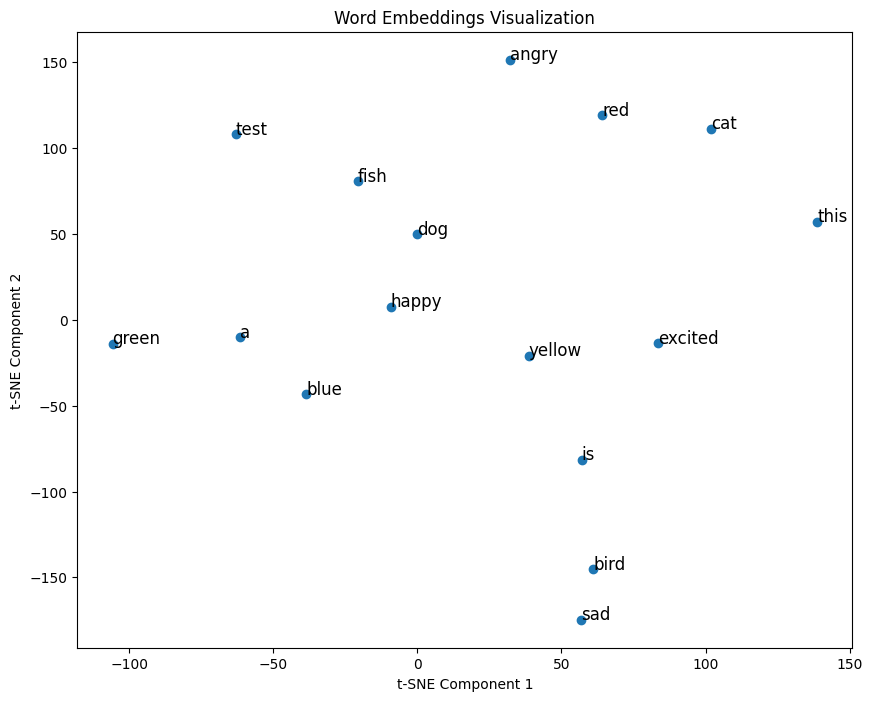

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from collections import Counter

class SimpleWord2Vec:
    def __init__(self, sentences, vector_size=10, min_count=1):
        self.vector_size = vector_size
        word_counts = Counter()
        for sentence in sentences:
            word_counts.update(sentence)
        self.vocab = {word: idx for idx, (word, count) in enumerate(word_counts.items()) 
                      if count >= min_count}
        vocab_size = len(self.vocab)
        self.embeddings = np.random.randn(vocab_size, vector_size) * 0.1
    def get_vector(self, word):
        if word in self.vocab:
            return self.embeddings[self.vocab[word]]
        else:
            return np.zeros(self.vector_size)

sentences = [
    ["cat", "dog", "bird", "fish"],
    ["red", "blue", "green", "yellow"],
    ["happy", "sad", "angry", "excited"],
    ["this", "is", "a", "test"]
]
model = SimpleWord2Vec(sentences, vector_size=10, min_count=1)

words = list(model.vocab.keys())
vectors = np.array([model.get_vector(word) for word in words])

tsne = TSNE(n_components=2, random_state=0, perplexity=min(3, len(words)-1))
Y = tsne.fit_transform(vectors)

plt.figure(figsize=(10, 8))
plt.scatter(Y[:, 0], Y[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (Y[i, 0], Y[i, 1]), fontsize=12)
plt.title('Word Embeddings Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# LSTM Modification
Modify the SentimentLSTM class to:

Accept variable vocabulary size as a parameter
Add a dropout layer for regularization
Return both the prediction and the hidden state

In [5]:
import torch
import torch.nn as nn

class SentimentLSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, dropout=0.5):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = self.embedding(x)
        out, (h, c) = self.lstm(x)
        out = self.dropout(out[:, -1, :])  # Apply dropout to the last time step's output
        prediction = torch.sigmoid(self.fc(out))
        return prediction, h

# Example usage
vocab_size = 10
embed_dim = 5
hidden_dim = 4
model = SentimentLSTM(vocab_size, embed_dim, hidden_dim)
sample_input = torch.randint(0, vocab_size, (1, 4))  # Batch of 1, 4 tokens
output, hidden_state = model(sample_input)
print("Prediction:", output)
print("Hidden State:", hidden_state.shape)

Prediction: tensor([[0.4449]], grad_fn=<SigmoidBackward0>)
Hidden State: torch.Size([1, 1, 4])


# Pipeline Comparison
Compare the results of sentiment analysis on the same text using different pre-trained models:

"sentiment-analysis" (default)
"cardiffnlp/twitter-roberta-base-sentiment-latest"
Test on: "The movie was okay, not great but not terrible either."

In [6]:
from transformers import pipeline

text = "The movie was okay, not great but not terrible either."

# Default sentiment analysis pipeline
classifier_default = pipeline("sentiment-analysis")
result_default = classifier_default(text)
print("Default Pipeline:", result_default)

# Twitter-specific sentiment analysis pipeline
classifier_twitter = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")
result_twitter = classifier_twitter(text)
print("Twitter Pipeline:", result_twitter)

/Users/luisvalencia/Documents/PythonPersonalProjects/mmlbook/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


Default Pipeline: [{'label': 'POSITIVE', 'score': 0.8981224894523621}]


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a

Twitter Pipeline: [{'label': 'positive', 'score': 0.7844904065132141}]


# Multi-Task NLP
Create a function that takes a text input and returns:

Sentiment analysis result
Named entities found
A summary (if text is long enough)
Test it on a news article or product review.

In [7]:
from transformers import pipeline

def multi_task_nlp(text):
    sentiment_analyzer = pipeline("sentiment-analysis")
    ner_recognizer = pipeline("ner", grouped_entities=True)
    summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

    sentiment = sentiment_analyzer(text)
    entities = ner_recognizer(text)
    summary = summarizer(text, max_length=130, min_length=30, do_sample=False) if len(text) > 200 else "Text too short to summarize."

    return sentiment, entities, summary

text = """
Apple is planning to release a new iPhone in September. The device is expected to have a faster processor and an improved camera. 
Many customers are excited about the new release, but some are concerned about the price. Overall, the sentiment is positive.
"""

sentiment, entities, summary = multi_task_nlp(text)
print("Sentiment:", sentiment)
print("Entities:", entities)
print("Summary:", summary)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0
No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassifi

Sentiment: [{'label': 'POSITIVE', 'score': 0.9985686540603638}]
Entities: [{'entity_group': 'ORG', 'score': np.float32(0.9970074), 'word': 'Apple', 'start': 1, 'end': 6}, {'entity_group': 'MISC', 'score': np.float32(0.9953843), 'word': 'iPhone', 'start': 36, 'end': 42}]
Summary: [{'summary_text': 'Apple is planning to release a new iPhone in September. The device is expected to have a faster processor and an improved camera. Many customers are excited about the new release. Some are concerned about the price.'}]


# Custom Question-Answering
Create a simple FAQ system using the question-answering pipeline. Prepare a context about PyTorch and test various questions about it.

In [8]:
from transformers import pipeline

qa = pipeline("question-answering")
context = """
PyTorch is an open-source machine learning framework based on the Torch library. 
It is developed by Facebook's AI Research lab and is used for applications such as computer vision and natural language processing. 
PyTorch is known for its flexibility and ease of use, making it popular among researchers and developers.
"""

def ask_question(question):
    return qa(question=question, context=context)

question1 = "Who develops PyTorch?"
question2 = "What is PyTorch used for?"

print("Question 1:", ask_question(question1))
print("Question 2:", ask_question(question2))

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


Question 1: {'score': 0.9020012021064758, 'start': 102, 'end': 128, 'answer': "Facebook's AI Research lab"}
Question 2: {'score': 0.6670629382133484, 'start': 166, 'end': 213, 'answer': 'computer vision and natural language processing'}
